In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Andrew Ng - ML practice/Logistic regression/ex2data1.txt")

In [ ]:
data.head()

,Score 1,Score 2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

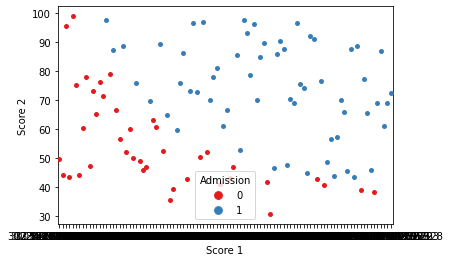

In [ ]:
sns.swarmplot(x="Score 1",y="Score 2",hue='Admission',data=data,palette="Set1");

In [ ]:
new_column = np.ones((100,1))
X = np.append(new_column, X, axis=1)

In [ ]:
iterations = 2000
alpha = 0.01

In [ ]:
def batch_gradient_descent(X, Y, theta, alpha, iterations):
  m = len(Y)
 
  for iteration in range(iterations):
 # print(iteration)
 # Hypothesis Values
    h = 1 / (1 + np.exp(-(X.dot(theta))))
 # Difference b/w Hypothesis and Actual Y
    loss = h - Y
 # Gradient Calculation
    gradient = X.T.dot(loss) / m
 # Changing Values of B using Gradient
    theta = theta - alpha * gradient
 # New Cost Value
  return theta

In [ ]:
# Splitting the dataset into training and testing sets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
theta = np.zeros(X_train.shape[1])

In [ ]:
theta.shape

(3,)

In [ ]:
new_weights = batch_gradient_descent(X_train, y_train, theta, alpha, iterations)

In [ ]:
def predict(X, new_weights):
  Z = 1 / ( 1 + np.exp( - ( X.dot(new_weights)) ) )
  Y = np.where( Z > 0.5, 1, 0 )
  return Y

In [ ]:
Y = predict(X_test, new_weights)

In [ ]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
def accuracy(Y_test, Y_pred):
  
  correctly_classified = 0
	
	# counter	
  count = 0	
  for count in range( np.size( Y_pred ) ) :
		
    if Y_test[count] == Y_pred[count] :			
      correctly_classified = correctly_classified + 1
    
    count = count + 1
  
  print( "Accuracy on test set by our model:",(correctly_classified / count ) * 100 )

In [ ]:
accuracy(y_test, Y)

Accuracy on test set by our model: 55.00000000000001
